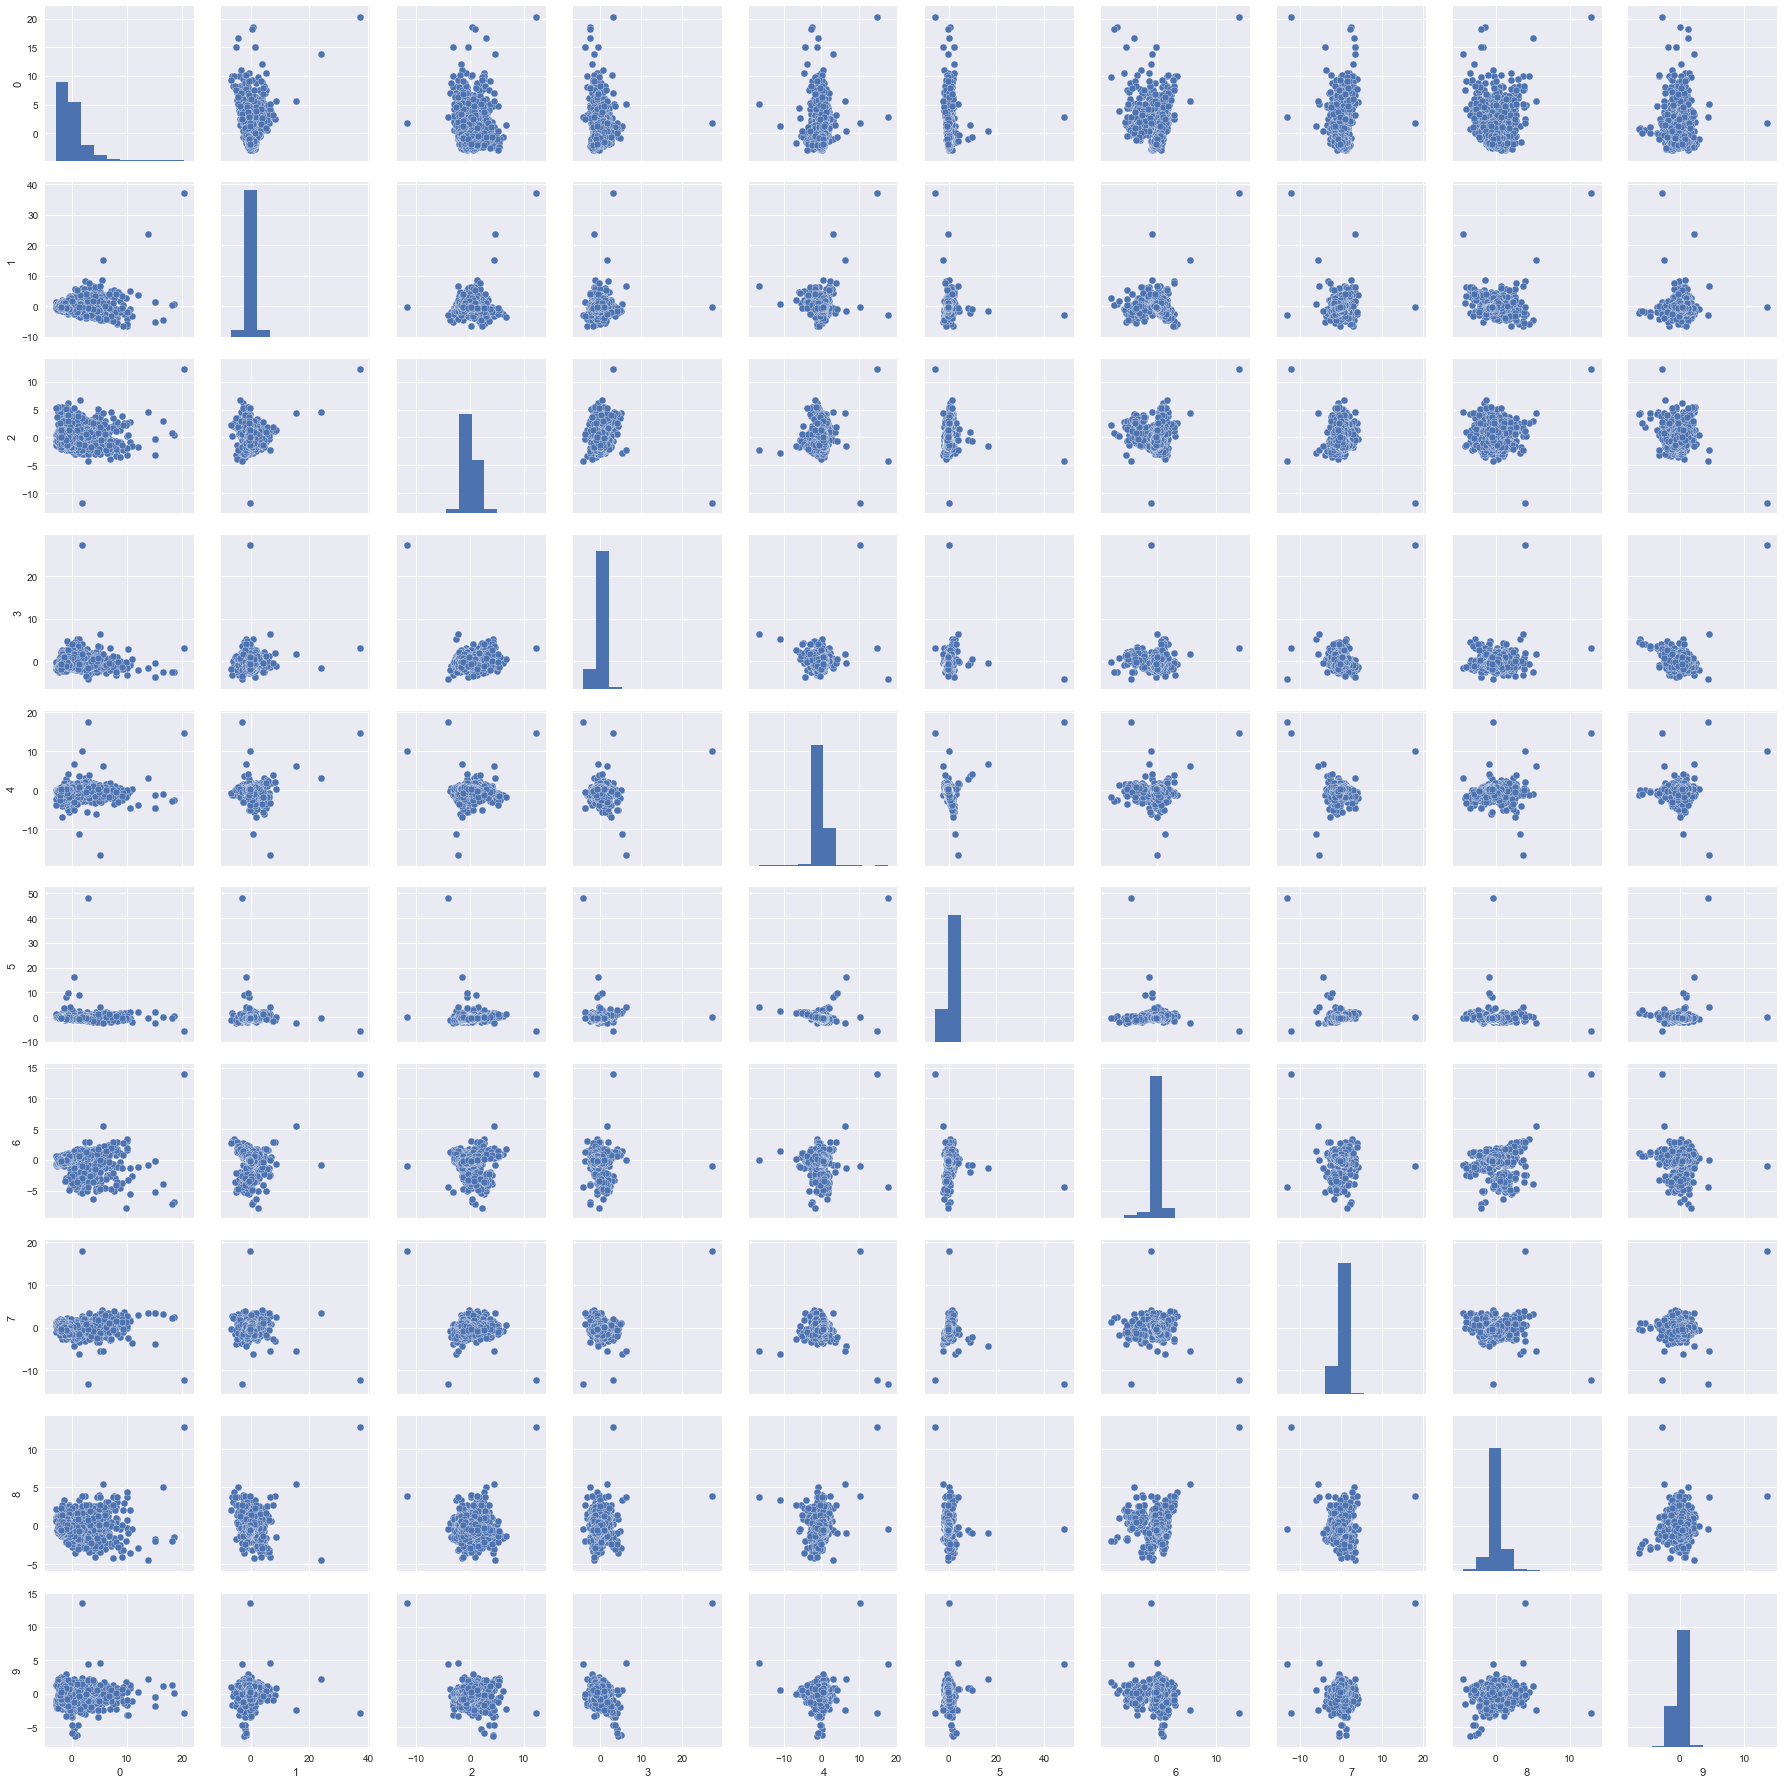

In [15]:
sns.pairplot(pd.DataFrame(data['PCA10']));

In [59]:
kmeans = KMeans(n_clusters=2)   # Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(data['PCA10'])

# Define our own color map
#LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
#label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
#plt.figure(figsize = (7,7))
#plt.scatter(data['PCA10'][:,0],data['PCA10'][:,1], c= label_color, alpha=0.5) 
#plt.show()

C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\chris\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


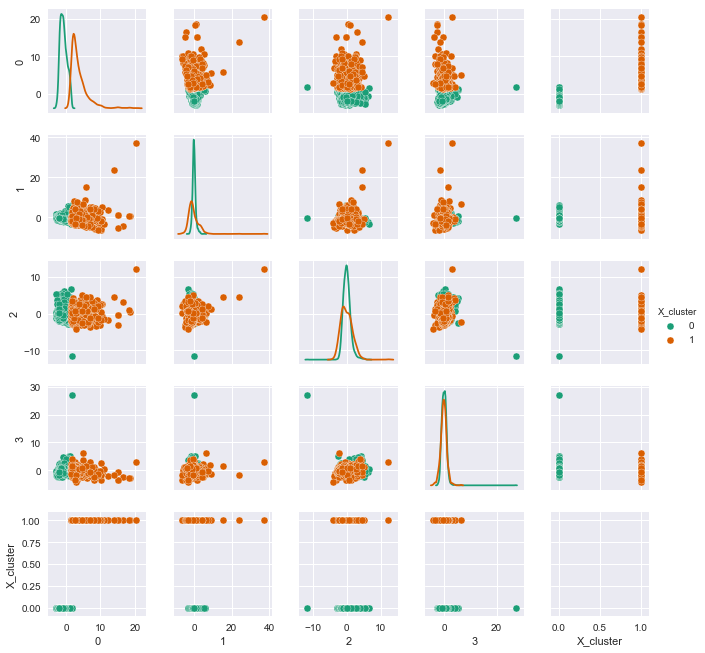

In [60]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(data['PCA10'])
df = df[[0,1,2,3]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85);

In [65]:
data['numerical']['X_cluster'] = X_clustered

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


36174262.27988615
140119108.5976431


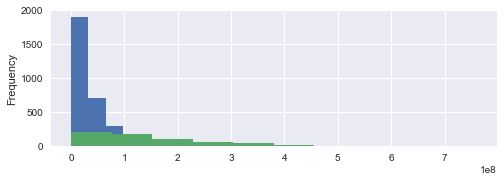

In [71]:
df0 = data['numerical'][data['numerical']['X_cluster'] == 0]
df1 = data['numerical'][data['numerical']['X_cluster'] == 1]
f = plt.subplot(211)
df0['gross'].plot.hist(ylim=(0,2000));
df1['gross'].plot.hist(ylim=(0,2000));
print(df0['gross'].mean())
print(df1['gross'].mean())

# Association Analysis

https://dzenanhamzic.com/2017/01/19/market-basket-analysis-mining-frequent-pairs-in-python/

http://pbpython.com/market-basket-analysis.html

## Descriptive Analysis

In [1]:
# Set a 3 KMeans clustering
kmeans = KMeans(n_clusters=3)
# Compute cluster centers and predict cluster indices
X_clustered = kmeans.fit_predict(data['PCA10'])

# Define our own color map
LABEL_COLOR_MAP = {0 : 'r',1 : 'g',2 : 'b'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(data['PCA10'][:,0],data['PCA10'][:,2], c= label_color, alpha=0.5) 
plt.show()

NameError: name 'KMeans' is not defined

c:\users\chris\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
c:\users\chris\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


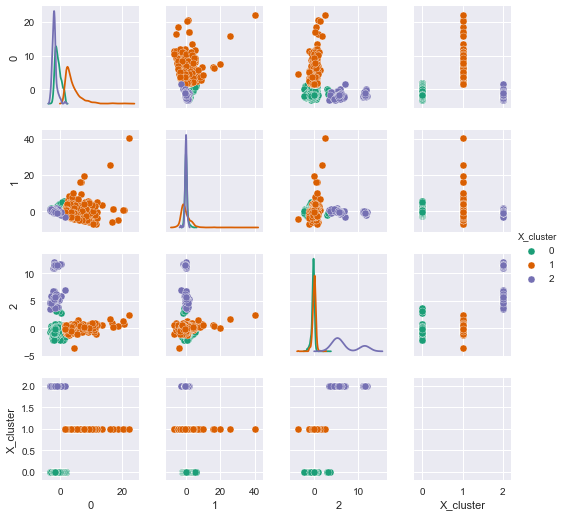

In [19]:
# Create a temp dataframe from our PCA projection data "x_9d"
df = pd.DataFrame(data['PCA9'])
df = df[[0,1,2]] # only want to visualise relationships between first 3 projections
df['X_cluster'] = X_clustered
sns.pairplot(df, hue='X_cluster', palette= 'Dark2', diag_kind='kde',size=1.85);

Analysis of relation between facebook likes and earnings

In [ ]:
work = df[['movie_facebook_likes','gross']].dropna();
work = work[(work != 0).all(1)];
work.plot.scatter('movie_facebook_likes', 'gross', grid=True);

Relation between movie_facebook_likes imdb_score

In [ ]:
work.nlargest(5, 'movie_facebook_likes')

In [ ]:
work = df[['imdb_score', 'movie_facebook_likes']].dropna();
work = work[(work != 0).all(1)];
work.plot.scatter('imdb_score', 'movie_facebook_likes', grid=True);

In [ ]:
dfc = df.corr()
np.fill_diagonal(dfc.values, 0)
dfc

In [ ]:
dfc.min()

In [ ]:
work = df[['imdb_score', 'movie_facebook_likes']].dropna();
work = work[(work != 0).all(1)];
work.plot.scatter('imdb_score', 'movie_facebook_likes', grid=True);

In [58]:
data['raw'][['gross']['director_name' == 'James Cameron']].head(8)

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
4            NaN
5     73058679.0
6    336530303.0
7    200807262.0
Name: gross, dtype: float64

In [57]:
pca = PCA(n_components=5, svd_solver = 'full')
pca.fit(data['one_hot'])
pca.components_ 

array([[ -1.22947885e-11,   1.22951100e-11,  -2.09364652e-13, ...,
          1.46863942e-10,   4.04649268e-11,   5.34702099e-06],
       [ -1.06568159e-10,   1.06567764e-10,  -2.29177537e-12, ...,
          3.21066909e-09,   3.10334154e-10,   1.11389880e-04],
       [  1.18625382e-07,  -1.18625377e-07,  -5.22977192e-10, ...,
          3.96284771e-06,   1.72605716e-07,   6.82985836e-02],
       [ -2.62498399e-07,   2.62498316e-07,   6.04357495e-09, ...,
          1.94678470e-07,   7.87422320e-07,   1.26862279e-01],
       [ -3.94739052e-07,   3.94738865e-07,  -3.35070410e-09, ...,
          2.23190954e-06,   1.31958973e-06,   9.88765134e-01]])

In [122]:
normalized_singular_values = list(pca.singular_values_/sum(pca.singular_values_))
normalized_singular_values

[0.76337773629957828,
 0.23607880909400641,
 0.00040173915128316896,
 8.0326568196162961e-05,
 6.1388886936007673e-05]

Principle Component Analysis reveals that the two first components account for close to 90% og the total variance.

## Principle Component Analysisssssss------------------------------------------------------------------------

In this chapter we will explore the singular values of the dataset, through Principle Component Analysis.

Since our dataset contains categorical data, we need to convert these columns to one-hot notation. To do this we create a function which converts all columns containing object data, to multiple columns with 1 or 0.

In [53]:
def toonehot(df):
    obj_df = df.select_dtypes(include=['object']).copy()
    obj_df[obj_df.isnull().any(axis=1)]
    cols = obj_df.columns.values.tolist()
    df2 = pd.get_dummies(obj_df, columns=cols, prefix=cols)
    df4 = pd.concat([df2, df.drop(cols, 1)], 1)
    
    return df4

In [55]:
data['one_hot'] = toonehot(data['no_nan'])
data['one_hot'].head(3)

,color_ Black and White,color_Color,director_name_Aaron Schneider,director_name_Aaron Seltzer,director_name_Abel Ferrara,director_name_Adam Goldberg,director_name_Adam Marcus,director_name_Adam McKay,director_name_Adam Rapp,director_name_Adam Rifkin,...,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,0,1,0,0,0,0,0,0,0,0,...,886204,4834,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78,33000
1,0,1,0,0,0,0,0,0,0,0,...,471220,48350,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35,0
2,0,1,0,0,0,0,0,0,0,0,...,275868,11700,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35,85000


From the dataframe head, we can see that the columns are now split out over multiple ... columns .... We can check this by selecting columns with the datatype 'object'.

In [56]:
data['one_hot'].select_dtypes(include=['object']).head(1)

""
0
